
# <p style="text-align: center;">MIS 382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wednesday, October 25th, submitted via Canvas by 11:59 pm</p>
### <p style="text-align: center;">Meyappan Subbaiah - ms47296 and Matthew Barrett - mb58428

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Gradient Descent (5+8+2=15pts)

In this question you will implement vanilla SGD and an adaptive gradient update technique called Adagrad. In addition, you will also implement ridge regularization. 

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'SGD' or 'adagrad' (Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch count (10 epochs) for the best 2 combinations of learning_rate and regularization for both SGD and Adagrad. ie you should have 2 plots of MSE and parameter updates for SGD and adagrad each. Report the MSE at the end of 10 epochs for all 4 combinations.
3. Based on the experiments, answer the following:

1. Which of the 2 techniqes allows for larger initial setting of the learning_rate? Why?
2. What would a drawback of adagrad be? How could this be fixed? (Hint: Adadelta)

### Part 1

#### Formulas

Weights are updated using the following formula:
$$w_{j} = w_{j} - \eta\Delta w_{j} $$

In this case $\Delta w_{j} = \dfrac {\delta E_{n}}{\delta w_{j}}$, where $E_{n}$ is our cost function.

The cost function is defined as: $E_{n} = (t_{n}-y_{n})^2 + \lambda * ||w||^2 $, where y is given in the problem statement. 

#### Derivations

The coefficient update $\Delta w_{j}$ is found for each coefficient from 

$$\frac {\delta E_{n}}{\delta w_{0}} = -2 (t_{n} - y_{n}) - 2 * \lambda *w_0  $$

$$\frac {\delta E_{n}}{\delta w_{1}} = -2*x_{1} (t_{n} - y_{n}) - 2 * \lambda *w_1 $$

$$\frac {\delta E_{n}}{\delta w_{2}} = -2*x_{1}*x_{2} (t_{n} - y_{n}) - 2 * \lambda *w_2 $$

$$\frac {\delta E_{n}}{\delta w_{3}} = -2*x_{2} (t_{n} - y_{n}) - 2 * \lambda *w_3 $$


#### Final Coefficient updates

Thus, our final weight updates are:

$$ w_{0} = w_{0} + 2\eta* (t_{n} - y_{n}) $$
$$ w_{1} = w_{1} + 2\eta * x_{1}(t_{n} - y_{n})$$
$$ w_{2} = w_{2} + 2\eta * x_{1}*x_{2}(t_{n} - y_{n}) $$
$$ w_{3} = w_{3} + 2\eta * x_{2}(t_{n} - y_{n}) $$


In [77]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

In [81]:
class StochasticGradient():
    
    def __init__(self, learnrate, reg_constant, epoch):
        """Accept basic inputs for the SG class:
           (1) learning rate (2) reg_constant and (3) epochs"""
        self.learnrate = learnrate
        self.reg_constant = reg_constant
        self.epoch = epoch
        
    def fit(self, X, y):
        """Accept X and Y data"""
        X = normalize(X)
        train, tgt = shuffle(X,y)
        ## Define Weights 
        weights = np.array([.0005]*4)
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        
        for ep in range(self.epoch):
            for reg in range(self.reg_constant):
                x1 = train[ep][0]
                x2 = train[ep][1]
                eta = self.learnrate
                t = pred[ep]
                y = w0 + w1*x1 + w2*x1*x2 + w3*x2
                
                # weight updates
                w0 = w0 + 2*(t-y)*eta + 2*ep*w0
                w1 = w1 + 2*x1*(t-y)*eta + 2*ep*w1
                w2 = w2 + 2*x1*x2*(t-y)*eta + 2*ep*w2
                w3 = w3 + 2*x2*(t-y)*eta + 2*ep*w3
                
                nweights = [w0, w1, w2, w3]
            ## Reshuffle data
            train, y = shuffle(X,y) 
        ## Save weights to use in predict
        self.weights = weights
        
    def predict(self, X, weights = None):
        
        pred = []
        
        ## Set original weights
        if weights == None:
            w0 = self.weights[0]
            w1 = self.weights[1]
            w2 = self.weights[2]
            w3 = self.weights[3]
        ## weight updates    
        else:
            w0 = weights[0]
            w1 = weights[1]
            w2 = weights[2]
            w3 = weights[3]
            
        n = self.learnrate
        
        for p in X:
            x1 = p[0]
            x2 = p[1]
            
            y_pred = w0 + w1*x1 + w2*x1*x2 + w3*x2
            
            pred.append(y_pred)
            
        self.pred = pred                               

In [82]:
samples = pd.read_csv('samples.csv', names=['index', 'x1', 'x2', 'target'], header = 0)
features = samples[['x1', 'x2']]
target = samples['target']

X, y = np.array(features), np.array(target)

In [84]:
learnrate = [.0001, .001, .01, 0.1, 1, 10, 100]
reg_constant = [0,10,100]

for learn in learnrate:
    for reg in reg_constant:
        sg1 = StochasticGradient(learnrate = learn, reg_constant = reg, epoch = 5)
        sg1.fit(X,y)
        sg1.predict(X)
        pred = sg1.pred
        mse_val = mean_squared_error(y,pred)
        print("SGD learning rate %s Reg Constant %s MSE %s "% (lr,reg,mse_val)) 

SGD learning rate 0.0001 Reg Constant 0 MSE 17.3376541822 


TypeError: Singleton array -0.00032017800532322738 cannot be considered a valid collection.

# Notes on Adagrad
Adagrad (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. A cache is maintained that holds the sum of squares of all gradients upto the current update. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = cache + (gradients^2)
2. weights = weights + ((learning_rate)/sqrt(cache+1e-6))*gradients

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

# 2. (6+4=10 pts) Tensor Playground
Visit http://playground.tensorflow.org for this problem

A. From the far right, select "Regression" as the problem type, and select the 2nd of the two data sets ( the right one ).  

   i) What sort of test / training loss do you get if you run it for 200 epochs with the following learning rates: .3, .01 and .003 ?  What if you run it for 1000 epochs with these learning rates?  Leave all other values at their defaults ( test/training ratio 50%, Noise 0, Batch Size 10, using Tanh activation function, and No Regularization )
   
   ii) Keeping learning rate at .3, Activation at Tanh, with all others at their defaults, and running for 200 epochs.  
     What sort of test/train loss can you achieve using only 1 neuron in the first hidden layer.  What about for 2,3 or 8 neurons?  Provide screen shots of output layer and comment on how the different output fits look and compare with one another.

   iii)Now keeping learning rate at .03 with all others at their defaults, and running for 200 epochs.  
       Compare how the activation functions affect the ouput ( ReLU, Sigmoid, Tanh, Linear ). Provide screen shots of output results and comment.


B. Neural Nets can fit anything.  Now reset to the initial defaults, and select "Classification" as the problem type, and from the Data section, select the bottom right "Spriral" data set.  With the idea of trying to minimize training/testing error, provide solutions to the problem for the following 2 scenarios.  i) Using just the first 2 inputs ( as per default ) and ii) Using all 7 of the inputs.  You may use as many layers as you want, whatever activation, however man neurons.  Provide screen shots which show your full network, output and parameters. Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. 

## ANSWER

### Part 1

(A) Tensor Flow Run 1: 200 epochs, learning 0.3  
(B) Tensor Flow Run 2: 200 epochs, learning 0.01  
(C) Tensor Flow Run 3: 200 epochs, learning 0.003  

A | B | C
- | - | -
![alt](epoch_200_lr_0.3.png) | ![alt](epoch_200_lr_0.01.png) | ![alt](epoch_200_lr_0.003.png)

(D) Tensor Flow Run 1: 1000 epochs, learning 0.3  
(E) Tensor Flow Run 2: 1000 epochs, learning 0.01  
(F) Tensor Flow Run 3: 1000 epochs, learning 0.003  

D | E | F
- | - | -
![alt](epoch_1000_lr_0.3.png) | ![alt](epoch_1000_lr_0.01.png) | ![alt](epoch_1000_lr_0.003.png)

** [Insert discussion here for the tensor flow of 200 epochs vs 1000 epochs) **

### Part 2

(A) 200 Epochs, 1 Neurons  
(B) 200 Epochs, 2 Neurons  
(C) 200 Epochs, 3 Neurons  
(D) 200 Epochs, 8 Neurons  

A | B | C | D
- | - | - | -
![alt](epoch_200_1_neurons.png) | ![alt](epoch_200_2_neurons.png) | ![alt](epoch_200_3_neurons.png) | ![alt](epoch_200_8_neurons.png)

** [Insert discussion here for the tensor flow of 200 epochs vs 1000 epochs) **

### Part 3

(A) Tanh  
(B) Sigmoid  
(C) Relu  
(D) Linear  

A | B | C | D
- | - | - | -
![alt](epoch_200_tanh.png) | ![alt](epoch_200_sigmoid.png) | ![alt](epoch_200_relu.png) | ![alt](epoch_200_linear.png)

B. Neural Nets can fit anything. Now reset to the initial defaults, and select "Classification" as the problem type, and from the Data section, select the bottom right "Spriral" data set. With the idea of trying to minimize training/testing error, provide solutions to the problem for the following 2 scenarios. i) Using just the first 2 inputs ( as per default ) and ii) Using all 7 of the inputs. You may use as many layers as you want, whatever activation, however man neurons. Provide screen shots which show your full network, output and parameters. Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.


### Part B
#### Part 1 - First 2 inputs (default)

![alt](epoch_part_b_2_inputs.png)

** [Insert Discussions here] **

#### Part 2 - All 7 inputs (default)

In [ ]:
More Neurons (1) Costs: Comp time, (2) overfitting is a problem

![alt](epoch_part_b_7_inputs.png)

# Question 3: Multi-layer Perceptron Regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the Appliances energy prediction dataset for this problem https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**.
Make sure you have 56 variables and one target variable.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

from sklearn import datasets

data = pd.read_csv('./energydata_complete.csv') 

y = data['Appliances']
X = data.drop(['date','Appliances', 'rv1', 'rv2'], axis = 1)


from dateutil import parser
timeData = np.array(data['date'])

days = []
hours = []
for line in xrange(len(timeData)):
    day = parser.parse(timeData[line]).weekday()
    hour = parser.parse(timeData[line]).hour
    days.append(day)
    hours.append(hour)
    
X = pd.concat([X, pd.get_dummies(days), pd.get_dummies(hours)], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((13222, 56), (13222,), (6513, 56), (6513,))


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. 

1) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, learning_rate_init = 0.005
    
Now, consider three different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (30,10)* (c) *hidden_layer_sizes = (100,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a), (b), and (c) (5pts)
      
2) Now, using the same number of hidden units used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works the best, (a), (b), or (c)? Briefly analyze the result in terms of the number of hidden units. (3pts)

3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves for model (a), (b), and (c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* value. (2pts)

4) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, hidden_layer_sizes = (15,)
    
Now, consider three different settings for the learning rates:
    
   (i) *learning_rate_init = 0.005* (ii) *learning_rate_init = 0.01* (iii) *learning_rate_init = 1*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (i), (ii), and (iii) (5pts)




### Answer
#### Part 1 - Training Set, 5 Fold CV

#### Scaler

In [2]:
X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = X_scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

#### Models (MLP-Regressor)

In [3]:
mlp2 = MLPRegressor(hidden_layer_sizes=(2,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42, 
                   batch_size=5000, learning_rate_init=0.005)


mlp30 = MLPRegressor(hidden_layer_sizes=(30,10), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.005)

mlp100 = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.005)

#### K-Folds

In [4]:
cv = KFold(n_splits=5, random_state=42)
cv.get_n_splits(X_train)

5

In [5]:
rmse_2 = []
rmse_30 = []
rmse_100 = []

In [6]:
for train, test in cv.split(X_train):
    # MLP Fits
    mlp2.fit(X_train.iloc[train], y_train.iloc[train])
    mlp30.fit(X_train.iloc[train], y_train.iloc[train])
    mlp100.fit(X_train.iloc[train], y_train.iloc[train])
    
    # compare predictions against y-true value 
    y_true = y_train.iloc[test]
    # mlp 2 predictions
    y2_predict = mlp2.predict(X_train.iloc[test])
    # mlp 30 predictions
    y30_predict = mlp30.predict(X_train.iloc[test])
    # mlp 100 predictions
    y100_predict = mlp100.predict(X_train.iloc[test])
    
    mse_2 = mean_squared_error(y_true, y2_predict)
    mse_30 = mean_squared_error(y_true, y30_predict)
    mse_100 = mean_squared_error(y_true, y100_predict)
    
    rmse_2.append(mse_2**.5)
    rmse_30.append(mse_30**.5)
    rmse_100.append(mse_100**.5)

**The average RMSE values reported below were found on the training sets with a 5 fold cross-validaition.**

In [7]:
print "2 Hidden Layers, Average RMSE: {:.2f}".format(np.mean(rmse_2))
print "30,10 Hidden Layers, Average RMSE: {:.2f}".format(np.mean(rmse_30))
print "100 Hidden Layers, Average RMSE: {:.2f}".format(np.mean(rmse_100))

2 Hidden Layers, Average RMSE: 95.00
30 Hidden Layers, Average RMSE: 102.59
100 Hidden Layers, Average RMSE: 81.65


#### Part 2 - Full Data 
##### Model Fit

In [8]:
mlp2.fit(X_train, y_train)
mlp30.fit(X_train, y_train)
mlp100.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size=5000, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.005, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
predict2_train = mlp2.predict(X_train)
predict2_test = mlp2.predict(X_test)

predict30_train = mlp30.predict(X_train)
predict30_test = mlp30.predict(X_test)

predict100_train = mlp100.predict(X_train)
predict100_test = mlp100.predict(X_test)

rmse2_train = mean_squared_error(y_train, predict2_train)**.5
rmse2_test = mean_squared_error(y_test, predict2_test)**.5

rmse30_train = mean_squared_error(y_train, predict30_train)**.5
rmse30_test = mean_squared_error(y_test, predict30_test)**.5

rmse100_train = mean_squared_error(y_train, predict100_train)**.5
rmse100_test = mean_squared_error(y_test, predict100_test)**.5

**The average RMSE values reported below were found on the test sets**

In [10]:
print "2 Hidden Layers, Average RMSE: {:.2f}".format(rmse2_test)
print "30,10 Hidden Layers, Average RMSE: {:.2f}".format(rmse30_test)
print "100 Hidden Layers, Average RMSE: {:.2f}".format(rmse100_test)

2 Hidden Layers, Average RMSE: 93.15
30 Hidden Layers, Average RMSE: 85.73
100 Hidden Layers, Average RMSE: 80.58


**The average RMSE values reported below were found on the training sets**

In [11]:
print "2 Hidden Layers, Average RMSE: {:.2f}".format(rmse2_train)
print "30,10 Hidden Layers, Average RMSE: {:.2f}".format(rmse30_train)
print "100 Hidden Layers, Average RMSE: {:.2f}".format(rmse100_train)

2 Hidden Layers, Average RMSE: 92.44
30 Hidden Layers, Average RMSE: 78.65
100 Hidden Layers, Average RMSE: 67.78


**Discussion: Insert some comments about test vs train sets on the full data set vs 5-fold CV. **

#### Part 3 - Loss Curve

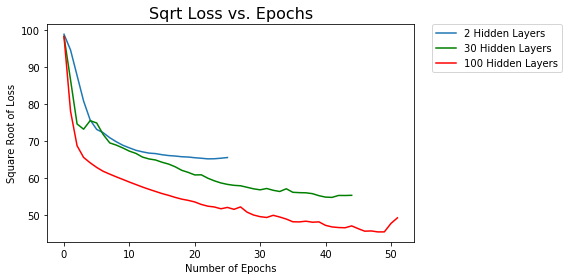

In [24]:
plt.title("Sqrt Loss vs. Epochs", fontsize=16)
plt.ylabel('Square Root of Loss')
plt.xlabel('Number of Epochs')
plt.plot(np.sqrt(mlp2.loss_curve_),label='2 Hidden Layers')
plt.plot(np.sqrt(mlp30.loss_curve_),color='g',label='30,10 Hidden Layers')
plt.plot(np.sqrt(mlp100.loss_curve_),color='r',label= '100 Hidden Layers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

#### Part 4 - Learning Rates manipulation

In [29]:
## Re-create data to ensure previous manipulation doesn't affect it
## probably don't need it, but just in-case.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)
X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = X_scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

In [30]:
mlp_lr1 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42, 
                   batch_size=5000, learning_rate_init=0.005)


mlp_lr2 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.01)

mlp_lr3 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=1)

In [31]:
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)
rmse_lr1 = []
rmse_lr2 = []
rmse_lr3 = []

In [32]:
for train, test in kf.split(X_train):
    # MLP Fits
    mlp_lr1.fit(X_train.iloc[train], y_train.iloc[train])
    mlp_lr2.fit(X_train.iloc[train], y_train.iloc[train])
    mlp_lr3.fit(X_train.iloc[train], y_train.iloc[train])
    
    # compare predictions against y-true value 
    y_true = y_train.iloc[test]
    # mlp 2 predictions
    y2_predict = mlp_lr1.predict(X_train.iloc[test])
    # mlp 30 predictions
    y30_predict = mlp_lr2.predict(X_train.iloc[test])
    # mlp 100 predictions
    y100_predict = mlp_lr3.predict(X_train.iloc[test])
    
    mse_lr1 = mean_squared_error(y_true, y2_predict)
    mse_lr2 = mean_squared_error(y_true, y30_predict)
    mse_lr3 = mean_squared_error(y_true, y100_predict)
    
    rmse_lr1.append(np.sqrt(mse_lr1))
    rmse_lr2.append(np.sqrt(mse_lr2))
    rmse_lr3.append(np.sqrt(mse_lr3))

**The average RMSE values reported below were found on the training sets with a 5 fold cross-validaition.**

In [33]:
print "15 Hidden Layers, Learning Rate = 0.005, Average RMSE: {:.2f}".format(np.mean(rmse_lr1))
print "15 Hidden Layers, Learning Rate = 0.01 , Average RMSE: {:.2f}".format(np.mean(rmse_lr2))
print "15 Hidden Layers, Learning Rate = 1    , Average RMSE: {:.2f}".format(np.mean(rmse_lr3))

15 Hidden Layers, Learning Rate = 0.005, Average RMSE: 88.33
15 Hidden Layers, Learning Rate = 0.01 , Average RMSE: 90.28
15 Hidden Layers, Learning Rate = 1    , Average RMSE: 51785446645.84


# Question 4: (2+5+3=10 pts) Bayes Decision Theory
a. Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.
( 2 points )

b. Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the customer does not buy a TV and 1 if they do. For each customer, you are given two features, $x_1$ is the per hour salary and $x_2$ is the age. Assume that the class conditional distribution $p([x_1 , x_2]|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 15 and 30 respectively and that of those who don’t is 8.5 and 25. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 3 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem. (5 points)

c. Now write code to sample 100 customers from each class (C = 0, 1) under the assumed distribution and the estimated parameters and plot their features. Additionally, plot the decision boundary you obtained in the part (b) on the same plot. (3 points)

## ANSWER

# Question 5: Decision Tree using Python (10 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use all the data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

from sklearn import tree
from sklearn.externals.six import StringIO
with open("decision_tree_gini.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?

#### Load Data

In [54]:
from sklearn import tree
from sklearn.externals.six import StringIO
data = pd.read_csv('BreastTissue.csv')
Y = data['Class']
X = data.iloc[:,2:]

#### Model (Gini, Max Depth = 2)

In [55]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
clf.fit(X,Y)
with open("decision_tree_gini.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,class_names=['adi','car', 'mas', 'gla', 'fad', 'con'])

![](Gini_plot.png)

#### Model (Entropy, Max Depth = 2)

In [57]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X,Y)
with open("decision_tree_entropy.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,class_names=['adi','car', 'mas', 'gla', 'fad', 'con'])

![](Entropy_Plot.png)

**INSERT DISCUSSION**